# Customer Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns from the customer base, so the client can learn the most relevant variables that are correlated to a churned customer.

## Inputs

* outputs/datasets/collection/TelcoCustomerChurn.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App

---

# Change working directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherryleaves/jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/cherryleaves'

---

# Load Data

In [6]:
import pandas as pd

train_file = '/workspace/cherryleaves/outputs/datasets/collection/train.csv'
val_file = '/workspace/cherryleaves/outputs/datasets/collection/val.csv'

train_df = pd.read_csv(train_file)
val_df = pd.read_csv(val_file)

print("Training Data Preview:")
print(train_df.head())

print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")


Training Data Preview:
                                          image_path  label
0  /workspace/cherryleaves/inputs/datasets/raw/ch...      1
1  /workspace/cherryleaves/inputs/datasets/raw/ch...      0
2  /workspace/cherryleaves/inputs/datasets/raw/ch...      0
3  /workspace/cherryleaves/inputs/datasets/raw/ch...      1
4  /workspace/cherryleaves/inputs/datasets/raw/ch...      0
Training data shape: (3366, 2)
Validation data shape: (842, 2)


Validate image paths

In [7]:
import os

missing_files = [path for path in train_df['image_path'] if not os.path.exists(path)]
print(f"Missing files in training data: {len(missing_files)}")

if missing_files:
    print("Sample of missing files:")
    print(missing_files[:5])  # Display the first few missing file paths
else:
    print("All training image paths are valid!")


Missing files in training data: 0
All training image paths are valid!


---

# Data Exploration

Explore the dataset to understand variable types and distributions and what this means for the study

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport

train_df = pd.read_csv("/workspace/cherryleaves/outputs/datasets/collection/train.csv")

profile = ProfileReport(train_df, title="Training Data Exploration Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above graphs allows me to gain a familiarity with the data, so I can chose the correct analysis and model for my future predictions. 
Here I can see 
* There are only 2 variables (these are the labels from the images that I created for the diseased/healthy images in the data cleaning phase)
* There is 3366 images in my training data specifically. This is a good quantity for training the model
* There are no missing or duplicated data which would require intervention 

The data is outlined in a simple text form below

In [9]:

print("Missing values per column:")
print(train_df.isnull().sum())

print("Data types of columns:")
print(train_df.dtypes)

print("Label distribution in training data:")
print(train_df['label'].value_counts())


Missing values per column:
image_path    0
label         0
dtype: int64
Data types of columns:
image_path    object
label          int64
dtype: object
Label distribution in training data:
label
1    1702
0    1664
Name: count, dtype: int64


In [10]:
print(train_df['label'].value_counts())


label
1    1702
0    1664
Name: count, dtype: int64


The count is similar enough that I am confident there a good balance between both sets of images to effectively train an AI model

---

# EDA

In order for the model to effectively be able to tell if a leaf is diseased or healthy, I first need to understand the difference between the images.

Displaying: /workspace/cherryleaves/inputs/datasets/raw/cherry-leaves/healthy/904d2f33-6bcd-45f6-9732-1d438165d525___JR_HL 4295.JPG (label=0) -> Exists? True


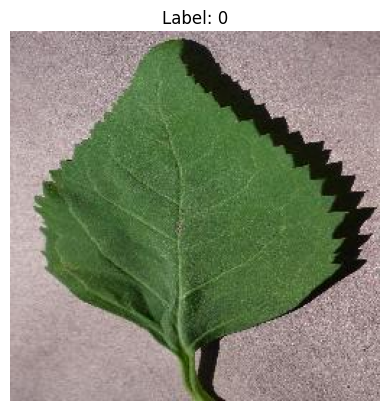

Displaying: /workspace/cherryleaves/inputs/datasets/raw/cherry-leaves/healthy/ea21a07c-746b-4c40-b9dd-bed17b367f3c___JR_HL 4082_180deg.JPG (label=0) -> Exists? True


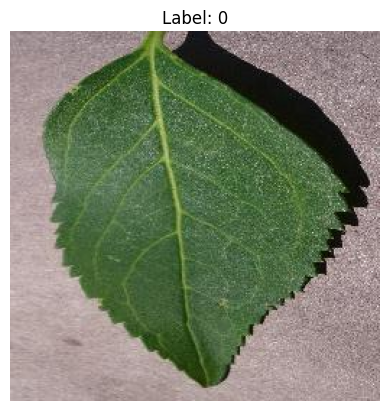

Displaying: /workspace/cherryleaves/inputs/datasets/raw/cherry-leaves/healthy/9ce21384-43da-4599-99c3-63af7c18cf96___JR_HL 4004_180deg.JPG (label=0) -> Exists? True


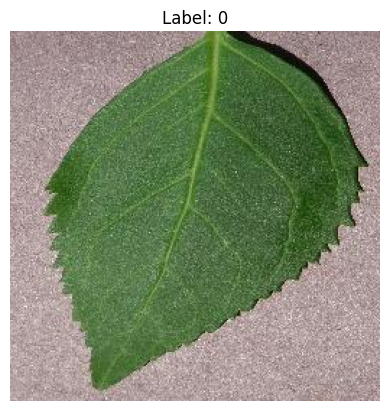

Displaying: /workspace/cherryleaves/inputs/datasets/raw/cherry-leaves/powdery_mildew/63da749f-b051-4b5b-98ad-217a21654171___FREC_Pwd.M 4619.JPG (label=1) -> Exists? True


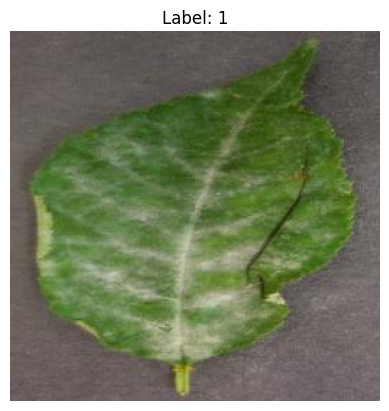

Displaying: /workspace/cherryleaves/inputs/datasets/raw/cherry-leaves/powdery_mildew/22e426ba-5abc-4c1c-85fb-00a603b378f7___FREC_Pwd.M 0560.JPG (label=1) -> Exists? True


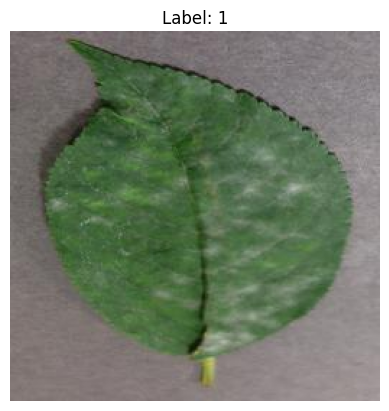

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

sampled_rows = train_df.sample(5, random_state=42)

for index, row in sampled_rows.iterrows():
    path = row['image_path']
    label = row['label']
    
    print(f"Displaying: {path} (label={label}) -> Exists? {os.path.exists(path)}")
    
    img_data = mpimg.imread(path)
    
    plt.figure()
    
    # Display the image
    plt.imshow(img_data)
    plt.axis('off')
    plt.title(f"Label: {label}")
    
    plt.show()

The sample of images taken show that they're good quailty and useable for the model. The images are correctly labelled as (1) for diseased and (0) for healthy. It also shows clearly the difference between a healthy leaf (0) showing only green tissue, and a diseased leaf (1) showing the leaf covered in cloudy white matter.